# 3 layer LSTM Encoder Decoder, dropout. 30 day input, 7 day forecast

In [6]:
import numpy as np
import pandas as pd
import json
import os
import math
import datetime as dt
import matplotlib.pyplot as plt
from numpy import newaxis
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, LSTM, CuDNNLSTM, BatchNormalization, RepeatVector, TimeDistributed
from keras.models import Sequential, load_model
from sklearn.metrics import mean_squared_error
from keras import regularizers

import utils
import model_funcs

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [16, 9]
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
save_dir = 'models/lstm4_5'
df = pd.read_csv('data_25_normalized.csv', index_col='Date')
data = df.values

In [8]:
num_input = 60
num_out = 1
train_X, train_y, dev_X, dev_y, test_X, test_y, train_y_acc, dev_y_acc, test_y_acc = utils.prepare_data(data, num_input, num_preds=num_out)

train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
dev_y = dev_y.reshape((dev_y.shape[0], dev_y.shape[1], 1))
test_y = test_y.reshape((test_y.shape[0], test_y.shape[1], 1))
train_y_acc = train_y_acc.reshape((train_y.shape[0], train_y.shape[1], 1))
dev_y_acc = dev_y_acc.reshape((dev_y.shape[0], dev_y.shape[1], 1))
test_y_acc = test_y_acc.reshape((test_y.shape[0], test_y.shape[1], 1))

print("train_X shape", train_X.shape)
print("train_y shape", train_y.shape)
print("dev_X shape", dev_X.shape)
print("dev_y shape", dev_y.shape)
print("test_X shape", test_X.shape)
print("test_y shape", test_y.shape)
print("train_y_acc shape", train_y_acc.shape)
print("dev_y_acc shape", dev_y_acc.shape)
print("test_y_acc shape", test_y_acc.shape)

train_X shape (618, 60, 25)
train_y shape (618, 1, 1)
dev_X shape (77, 60, 25)
dev_y shape (77, 1, 1)
test_X shape (78, 60, 25)
test_y shape (78, 1, 1)
train_y_acc shape (618, 1, 1)
dev_y_acc shape (77, 1, 1)
test_y_acc shape (78, 1, 1)


In [9]:
if not os.path.exists(save_dir): os.makedirs(save_dir)

input_shape = train_X.shape[1:]
lr = 0.0005
decay = 1e-6
dropout_rate = 0.3
epochs = 500
batch_size = 32

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)))
model.add(RepeatVector(num_out))
model.add(LSTM(200, activation='relu', return_sequences=True, kernel_regularizer=regularizers.l2(0.001)))
model.add(TimeDistributed(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001))))
model.add(TimeDistributed(Dense(1)))

opt = Adam(lr=lr, decay=decay)
model.compile(loss="mse", optimizer=opt)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               180800    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 100)            20100     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 1, 1)              101       
Total params: 521,801
Trainable params: 521,801
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model_funcs.train(
    model,
    train_X,
    train_y,
    (dev_X, dev_y),
    epochs = epochs,
    batch_size = batch_size,
    save_dir = save_dir
)

[Model] Training Started
[Model] 500 epochs, 32 batch size
Instructions for updating:
Use tf.cast instead.
Train on 618 samples, validate on 77 samples
Epoch 1/500
618/618 [==============================] - 4s 6ms/step - loss: 0.4904 - val_loss: 0.3799
Epoch 2/500
618/618 [==============================] - 3s 4ms/step - loss: 0.3372 - val_loss: 0.2804
Epoch 3/500
618/618 [==============================] - 2s 4ms/step - loss: 0.2452 - val_loss: 0.2069
Epoch 4/500
618/618 [==============================] - 2s 4ms/step - loss: 0.1816 - val_loss: 0.1538
Epoch 5/500
618/618 [==============================] - 2s 4ms/step - loss: 0.1363 - val_loss: 0.1166
Epoch 6/500
618/618 [==============================] - 2s 4ms/step - loss: 0.1039 - val_loss: 0.0913
Epoch 7/500
618/618 [==============================] - 2s 4ms/step - loss: 0.0807 - val_loss: 0.0707
Epoch 8/500
618/618 [==============================] - 2s 4ms/step - loss: 0.0641 - val_loss: 0.0559
Epoch 9/500
618/618 [===================

618/618 [==============================] - 2s 3ms/step - loss: 0.0019 - val_loss: 0.0040
Epoch 78/500
618/618 [==============================] - 2s 4ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 79/500
618/618 [==============================] - 2s 4ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 80/500
618/618 [==============================] - 2s 4ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 81/500
618/618 [==============================] - 2s 3ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 82/500
618/618 [==============================] - 2s 3ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 83/500
618/618 [==============================] - 2s 4ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 84/500
618/618 [==============================] - 2s 4ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 85/500
618/618 [==============================] - 3s 4ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 86/500
618/618 [==============================] - 2s 3ms/step - loss: 0.0021 - val_loss: 

618/618 [==============================] - 2s 4ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 157/500
618/618 [==============================] - 2s 3ms/step - loss: 0.0010 - val_loss: 8.7009e-04
Epoch 158/500
618/618 [==============================] - 2s 3ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 159/500
618/618 [==============================] - 2s 3ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 160/500
618/618 [==============================] - 2s 3ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 161/500
618/618 [==============================] - 2s 3ms/step - loss: 9.5882e-04 - val_loss: 0.0012
Epoch 162/500
618/618 [==============================] - 2s 3ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 163/500
618/618 [==============================] - 2s 3ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 164/500
618/618 [==============================] - 2s 3ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 165/500
618/618 [==============================] - 2s 3ms/step - loss: 0.

618/618 [==============================] - 2s 4ms/step - loss: 8.4434e-04 - val_loss: 0.0012
Epoch 234/500
618/618 [==============================] - 2s 3ms/step - loss: 7.9437e-04 - val_loss: 0.0012
Epoch 235/500
618/618 [==============================] - 2s 3ms/step - loss: 7.7863e-04 - val_loss: 0.0016
Epoch 236/500
618/618 [==============================] - 2s 3ms/step - loss: 8.6582e-04 - val_loss: 8.3980e-04
Epoch 237/500
618/618 [==============================] - 2s 3ms/step - loss: 9.7158e-04 - val_loss: 0.0016
Epoch 238/500
618/618 [==============================] - 2s 3ms/step - loss: 9.0612e-04 - val_loss: 0.0010
Epoch 239/500
618/618 [==============================] - 2s 3ms/step - loss: 9.1240e-04 - val_loss: 0.0024
Epoch 240/500
618/618 [==============================] - 2s 3ms/step - loss: 9.5917e-04 - val_loss: 0.0016
Epoch 241/500
618/618 [==============================] - 2s 3ms/step - loss: 7.9585e-04 - val_loss: 0.0022
Epoch 242/500
618/618 [========================

618/618 [==============================] - 2s 3ms/step - loss: 6.5566e-04 - val_loss: 0.0011
Epoch 310/500
618/618 [==============================] - 2s 4ms/step - loss: 6.6117e-04 - val_loss: 0.0017
Epoch 311/500
618/618 [==============================] - 2s 3ms/step - loss: 7.1064e-04 - val_loss: 0.0018
Epoch 312/500
618/618 [==============================] - 2s 3ms/step - loss: 7.1912e-04 - val_loss: 0.0021
Epoch 313/500
618/618 [==============================] - 2s 3ms/step - loss: 7.2297e-04 - val_loss: 0.0012
Epoch 314/500
618/618 [==============================] - 2s 3ms/step - loss: 7.0128e-04 - val_loss: 0.0014
Epoch 315/500
618/618 [==============================] - 2s 3ms/step - loss: 8.0437e-04 - val_loss: 0.0010
Epoch 316/500
618/618 [==============================] - 2s 4ms/step - loss: 6.5281e-04 - val_loss: 0.0013
Epoch 317/500
618/618 [==============================] - 2s 3ms/step - loss: 7.0820e-04 - val_loss: 0.0019
Epoch 318/500
618/618 [============================

618/618 [==============================] - 2s 3ms/step - loss: 6.4878e-04 - val_loss: 0.0025
Epoch 386/500
618/618 [==============================] - 2s 3ms/step - loss: 8.0057e-04 - val_loss: 0.0016
Epoch 387/500
618/618 [==============================] - 2s 3ms/step - loss: 8.2264e-04 - val_loss: 0.0014
Epoch 388/500
618/618 [==============================] - 2s 3ms/step - loss: 6.6746e-04 - val_loss: 0.0014
Epoch 389/500
618/618 [==============================] - 2s 3ms/step - loss: 6.4911e-04 - val_loss: 0.0022
Epoch 390/500
618/618 [==============================] - 2s 3ms/step - loss: 5.8979e-04 - val_loss: 0.0030
Epoch 391/500
618/618 [==============================] - 2s 3ms/step - loss: 6.0935e-04 - val_loss: 0.0027
Epoch 392/500
618/618 [==============================] - 2s 3ms/step - loss: 6.0779e-04 - val_loss: 0.0029
Epoch 393/500
618/618 [==============================] - 2s 3ms/step - loss: 7.3583e-04 - val_loss: 0.0021
Epoch 394/500
618/618 [============================

618/618 [==============================] - 2s 3ms/step - loss: 6.3182e-04 - val_loss: 0.0018
Epoch 462/500
618/618 [==============================] - 2s 3ms/step - loss: 6.9413e-04 - val_loss: 0.0025
Epoch 463/500
618/618 [==============================] - 2s 3ms/step - loss: 7.3832e-04 - val_loss: 0.0027
Epoch 464/500
618/618 [==============================] - 2s 3ms/step - loss: 5.8577e-04 - val_loss: 0.0016
Epoch 465/500
618/618 [==============================] - 2s 3ms/step - loss: 5.8542e-04 - val_loss: 0.0025
Epoch 466/500
618/618 [==============================] - 2s 3ms/step - loss: 7.2681e-04 - val_loss: 0.0033
Epoch 467/500
618/618 [==============================] - 2s 3ms/step - loss: 6.6370e-04 - val_loss: 0.0031
Epoch 468/500
618/618 [==============================] - 2s 3ms/step - loss: 5.7229e-04 - val_loss: 0.0036
Epoch 469/500
618/618 [==============================] - 2s 3ms/step - loss: 7.6398e-04 - val_loss: 0.0026
Epoch 470/500
618/618 [============================

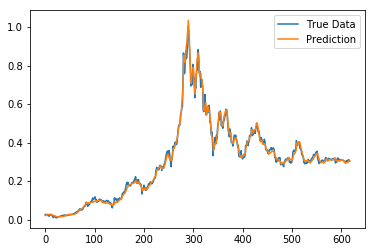

In [15]:
predicted_train = model.predict(train_X)
predicted_train = predicted_train.reshape(-1,1)
true_train = train_y.reshape(-1,1)
utils.plot_results(predicted_train.tolist(), true_train)

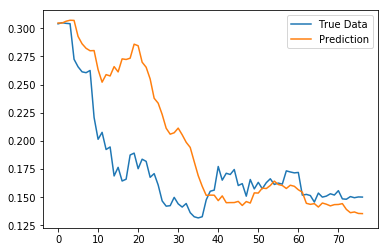

In [17]:
predicted_dev = model.predict(dev_X)
predicted_dev = predicted_dev.reshape(-1,1)
true_dev = dev_y.reshape(-1,1)
utils.plot_results(predicted_dev.tolist(), true_dev)

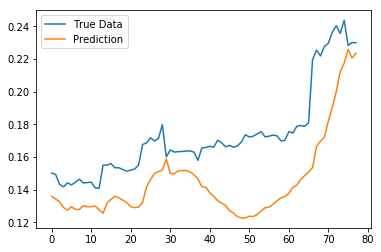

In [19]:
predicted_test = model.predict(test_X)
predicted_test = predicted_test.reshape(-1,1)
true_test = test_y.reshape(-1,1)
utils.plot_results(predicted_test.tolist(), true_test)

In [20]:
print("MSE Train:", mean_squared_error(predicted_train.reshape(-1,1)[:len(true_train)], true_train))
print("MSE Dev:", mean_squared_error(predicted_dev.reshape(-1,1)[:len(true_dev)], true_dev))
print("MSE Test:", mean_squared_error(predicted_test.reshape(-1,1)[:len(true_test)], true_test))

MSE Train: 0.00029736807721450926
MSE Dev: 0.002150040890211002
MSE Test: 0.000984378088762296


In [21]:
print("Acc Train:", utils.direction_accuracy(predicted_train.reshape(-1,1)[:len(true_train)], true_train))
print("Acc Dev:", utils.direction_accuracy(predicted_dev.reshape(-1,1)[:len(true_dev)], true_dev))
print("Acc Test:", utils.direction_accuracy(predicted_test.reshape(-1,1)[:len(true_test)], true_test))

Acc Train: 0.5494327390599676
Acc Dev: 0.3684210526315789
Acc Test: 0.4935064935064935


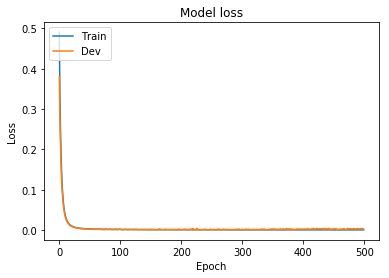

In [22]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()